<a href="https://colab.research.google.com/github/mint673/agrobot/blob/master/labelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import functools as f
import csv
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


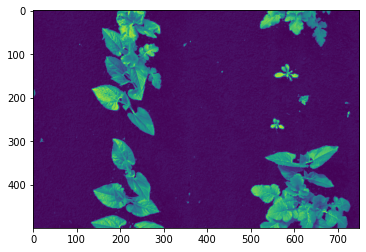

In [ ]:
img=cv2.imread('/content/drive/MyDrive/Datasets 2022/check data/otsu_thre/Copy of Weedelec_haricot_2019-09-25T114908-125.jpg')
img_hsv= cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# print(img_hsv)
# print(img_gray)
plt.imshow(img_gray)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


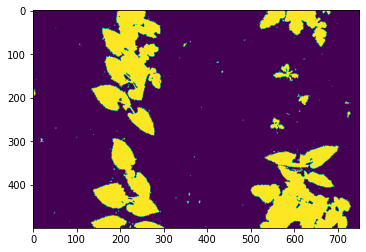

In [ ]:
# rough thresholding (ie turning image into completely black and white)
img_thre = cv2.threshold(img_gray, 30, 255, cv2.THRESH_BINARY)[1]
print(img_thre)
plt.imshow(img_thre)

In [ ]:
# extracting coords of white pixels
rows, cols = np.where(img_thre == 255)
# print(rows)
# print(cols)
leaf_coords = list(zip(rows,cols))
print(leaf_coords)

NameError: ignored

In [ ]:
ex1 = [[(0,1), (2,3), (4,5)], 
       [(6,7), (8,9), (10,11)], 
       [(2,0), (2,1), (2,2)]]

In [ ]:
import functools as f

# get bounding box

# example: 
# ex1 = [[(0,1), (2,3), (4,5)], 
#        [(6,7), (8,9), (10,11)], 
#        [(2,0), (2,1), (2,2)]]
# output: [{'x_min': 0, 'x_max': 4, 'y_min': 1, 'y_max': 5}, {'x_min': 6, 'x_max': 10, 'y_min': 7, 'y_max': 11}, {'x_min': 2, 'x_max': 2, 'y_min': 0, 'y_max': 2}]


def get_all_bounding_coords(leaf_coords):

  def get_bounding_coords(coords):
    x_min = f.reduce(min, [c[0] for c in coords])
    x_max = f.reduce(max, [c[0] for c in coords])
    y_min = f.reduce(min, [c[1] for c in coords])
    y_max = f.reduce(max, [c[1] for c in coords])
    return {'x_min': x_min, 'x_max': x_max, 'y_min': y_min, 'y_max': y_max}

  return list(map(get_bounding_coords, leaf_coords))


[{'x_min': 0, 'x_max': 4, 'y_min': 1, 'y_max': 5}, {'x_min': 6, 'x_max': 10, 'y_min': 7, 'y_max': 11}, {'x_min': 2, 'x_max': 2, 'y_min': 0, 'y_max': 2}]


In [ ]:
import csv

# write to csv
def write_coords_to_csv(img_name, path, coords):
  fields = ['img_name'] 
  rows = []
  for c in coords:
    rows.append([c]) 
  with open(path, 'w') as f:
    write = csv.writer(f)
    write.writerow(fields)
    write.writerows(rows)



[[{'x_min': 0, 'x_max': 4, 'y_min': 1, 'y_max': 5}], [{'x_min': 6, 'x_max': 10, 'y_min': 7, 'y_max': 11}], [{'x_min': 2, 'x_max': 2, 'y_min': 0, 'y_max': 2}]]


In [ ]:
# data to be written row-wise in csv file
data = [['Geeks'], [4], ['geeks !']]
 
# opening the csv file in 'w+' mode
file = open('g4g.csv', 'w+', newline ='')
 
# writing the data into the file
with file:   
    write = csv.writer(file)
    write.writerows(data)